## Importando o Pandas ##





In [1]:

import pandas as pd

In [6]:
# Carregando a panilha de vendas
df = pd.read_excel('/content/planilha_vendas_projeto.xlsx')

In [8]:
# Mostra uma prévia da nossa planilha (Por padrão as primeiras 5 linhas)
display(df.head())

,Data da Venda,Vendedor,Produto,Quantidade,Valor Unitário (R$),Valor Total da Venda (R$)
0,2025-05-28,Dra. Eloah da Costa,Smartphone,1,2500,2500
1,2025-03-09,Dr. Davi Jesus,Mouse,2,100,200
2,2025-03-20,Dr. Felipe Oliveira,Teclado,2,150,300
3,2025-05-28,Evelyn Moura,Smartphone,5,2500,12500
4,2025-06-02,João Farias,Smartphone,5,2500,12500


## Consultas Básicas ##


In [9]:
# Valor total Vendido:
print("Total vendido: R$", df['Valor Total da Venda (R$)'].sum())

Total vendido: R$ 525250


In [10]:
# Top 3 dos vendedores que mais venderam na nossa planilha com nlargest:
top_vendedores = df.groupby('Vendedor')['Valor Total da Venda (R$)'].sum().nlargest(3)
print("\nTop 3 vendedores:")
display(top_vendedores)


Top 3 vendedores:


,Valor Total da Venda (R$)
Vendedor,
Dra. Alice da Cunha,17500
Esther Cunha,17500
Srta. Maria Sophia Costa,17500


In [11]:
# Produto mais vendido por quantidade:
produto_mais_vendido = df.groupby('Produto')['Quantidade'].sum().idxmax()
print("\nProduto mais vendido :", produto_mais_vendido)


Produto mais vendido : Teclado


## Operações ##

In [15]:
# Adicionando uma coluna de comissão, será 10% encima do valor total da venda:
df['Comissão'] = df['Valor Total da Venda (R$)'] * 0.10
display(df.head()) ## Confirmando que a coluna Comissão foi adicionada

,Data da Venda,Vendedor,Produto,Quantidade,Valor Unitário (R$),Valor Total da Venda (R$),Comissão
0,2025-05-28,Dra. Eloah da Costa,Smartphone,1,2500,2500,250.0
1,2025-03-09,Dr. Davi Jesus,Mouse,2,100,200,20.0
2,2025-03-20,Dr. Felipe Oliveira,Teclado,2,150,300,30.0
3,2025-05-28,Evelyn Moura,Smartphone,5,2500,12500,1250.0
4,2025-06-02,João Farias,Smartphone,5,2500,12500,1250.0


In [25]:
# Retornando quanto um vendedor tem pra receber de comissão pelo nome, com tratamento de erro caso não ache o vendedor ou não tenha venda registrada:

try:
    nome_vendedor = "Dr. Davi Jesus"  # Coloque o nome que deseja consultar
    comissao = df.loc[df['Vendedor'] == nome_vendedor, 'Comissão'].sum()

    if comissao > 0:
        print(f"{nome_vendedor} tem R$ {comissao:.2f} de comissão a receber.")
    else:
        print("Vendedor não encontrado ou sem vendas registradas")

except Exception as e:
    print(f"Erro na consulta: {e}")


Dr. Davi Jesus tem R$ 20.00 de comissão a receber.


In [32]:
# Filtra e exibe o vendedor, o produto, quantidade e o valor total de TODAS as vendas acima de R$ 5.000 #
vendas_acima_5k = df[df['Valor Total da Venda (R$)'] > 5000][['Vendedor', 'Produto', 'Quantidade', 'Valor Total da Venda (R$)']]

print(f"Total de registros encontrados: {len(vendas_acima_5k)}\n")
display(vendas_acima_5k)

Total de registros encontrados: 33



,Vendedor,Produto,Quantidade,Valor Total da Venda (R$)
3,Evelyn Moura,Smartphone,5,12500
4,João Farias,Smartphone,5,12500
8,Srta. Maria Sophia Costa,Notebook,5,17500
11,Alexandre da Mota,Cadeira Gamer,5,6000
17,Calebe Costa,Smartphone,4,10000
18,Gustavo Rodrigues,Smartphone,3,7500
21,Maysa Ramos,Cadeira Gamer,5,6000
22,Vicente da Luz,Smartphone,4,10000
23,Bárbara Martins,Smartphone,5,12500
27,Sofia Monteiro,Notebook,2,7000


## Visualização com Gráficos ##

In [36]:
# Importanto a biblioteca de visualização no python:
import matplotlib.pyplot as plt

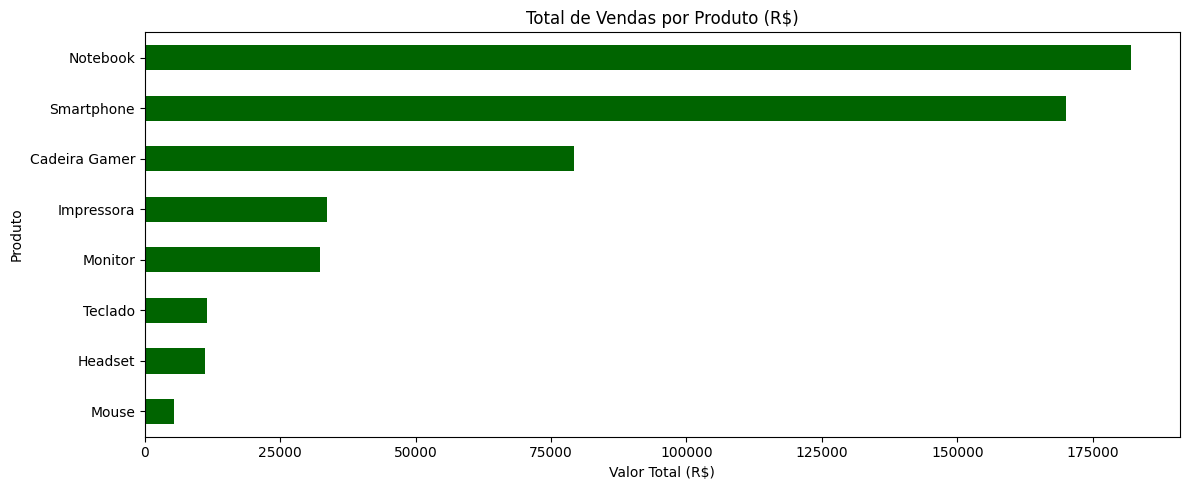

In [37]:
# Gráfico de vendas por produto:
plt.figure(figsize=(12,5))
df.groupby('Produto')['Valor Total da Venda (R$)'].sum().sort_values().plot(
    kind='barh',
    title='Total de Vendas por Produto (R$)',
    color='darkgreen',
    xlabel='Valor Total (R$)',
    ylabel='Produto'
)
plt.tight_layout()
plt.show()

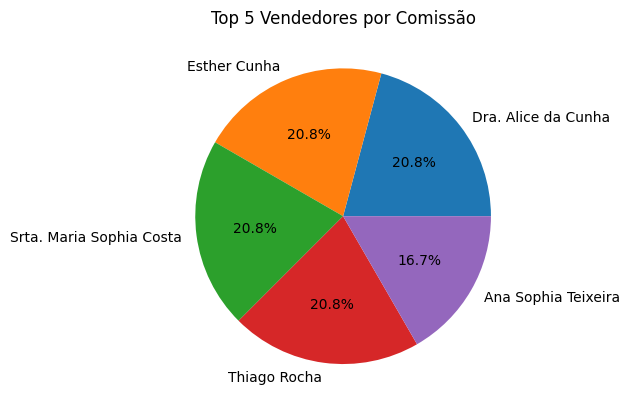

In [38]:
# Gráfico de pizza para a Distribuição de comissões, somente os 5 que mais venderam.
df.groupby('Vendedor')['Comissão'].sum().nlargest(5).plot(
    kind='pie',
    title='Top 5 Vendedores por Comissão',
    autopct='%1.1f%%'
)
plt.ylabel('')  # Remove label do eixo Y
plt.show()